#### 13.1 Bitly의 1.USA.gov 데이터

In [1]:
path = "datasets/bitly_usagov/example.txt"

In [3]:
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [5]:
import json
with open(path,encoding='UTF8') as f:
    records = [json.loads(line) for line in f]

In [6]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

#### 13.1.1 순수 파이썬으로 표준 시간대 계산하기

In [7]:
time_zones = [rex["tz"] for rec in records]

NameError: name 'rex' is not defined

- 모든 records가 표준 시간대 필드를 가지고 있는 것이 아님을 알 수 있다

In [9]:
#tz필드가 있는지 검사
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [10]:
#위에 보면 빈칸이 있다. 시간대 필드를 가지지 않은 필드임을 의미
#표준시간대를 반복하면서 딕셔너리를 사용해 수를 저장하자
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [16]:
#파이썬 라이브러리 고급 도구를 사용하는 방법
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) #값이 0으로 초기화
    for x in sequence:
        counts[x] += 1
    return counts

In [17]:
#기본기능을 사용하는 방법
counts = get_counts(time_zones)
counts["America/New_York"]

In [18]:
#고급라이브러리를 사용하는 방법
counts2 = get_counts2(time_zones)
counts2["America/New_York"]

1251

In [14]:
len(time_zones)

3440

In [19]:
#가장 많이 등장하는 상위 10개의 표준 시간대를 알고 싶다면 튜플의 리스트를 만들고 정렬
def top_counts(count_dict, n=10):
    value_key_pairs = [(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [20]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [21]:
#표준 라이브러리의 collections.Counter 클래스를 이용하면 지금까지 했던 작업을 쉽게 할 수 있음
from collections import Counter
counts = Counter(time_zones)

In [22]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

#### 13.1.2 판다스로 표준 시간대 계산하기

In [24]:
import pandas as pd
frame = pd.DataFrame(records)

C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [25]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [26]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [28]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In [29]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In [31]:
import seaborn as sns
subset = tz_counts.head()

<Axes: >

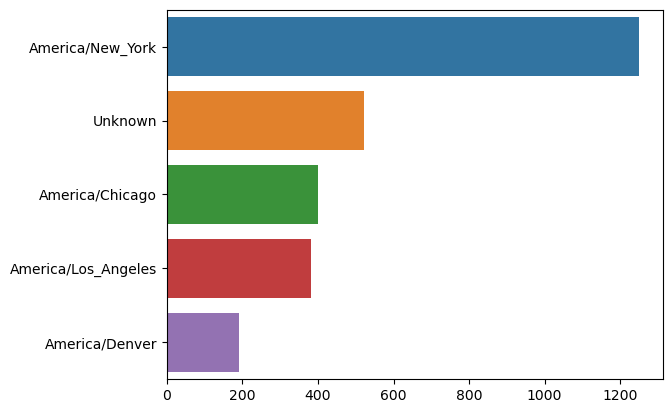

In [32]:
sns.barplot(y=subset.index, x=subset.to_numpy())

In [33]:
#a 필드에는 URL 단축을 실행하는 브라우저, 단말기, 애플리케이션에 대한 정보가 들어있다
frame["a"][1]

'GoogleMaps/RochesterNY'

In [34]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [35]:
frame["a"][50][:50] #긴 문자열

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/2010'

- 이런 문자열 정보를 agent라고 부른다
- 문자열을 분석하는 한 가지 전략은 문자열의 첫 번째 토큰을 브라우저 종류를 파악할 수 있을 만큼만 잘라서 또다른 개요를 만드는 것

In [36]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [37]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

- 표준 시간대 순위표를 윈도우 사용자와 비윈도우 사용자 그룹으로 나눠보자
- agent 문자열이 Windows를 포함하면 윈도우 사용자라고 가정하고 agent 값이 없는 데이터는 코드를 이용해서 제외

In [40]:
import numpy as np
cframe = frame[frame["a"].notna()].copy()
#각 행이 윈도우인지 아닌지 검사
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Wondows", "Not Windows")
cframe["os"].head()

0        Wondows
1    Not Windows
2        Wondows
3    Not Windows
4        Wondows
Name: os, dtype: object

In [41]:
by_tz_os = cframe.groupby(["tz","os"])

In [42]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Wondows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [43]:
#전체 표준 시간대의 순위를 모아보자
#agg_counts의 행 개수에서 간접 색인 배열 구성
#행 개수를 계산한 후 오름차순으로 정렬하는 데 사용할 색인 배열을 구함
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

In [44]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Wondows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [45]:
#편리한 메서드로
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [46]:
#색인을 재설정해 데이터가 시본과 더 잘 호환되도록 재정렬
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Wondows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Wondows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Wondows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Wondows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Wondows,31.0


<Axes: xlabel='total', ylabel='tz'>

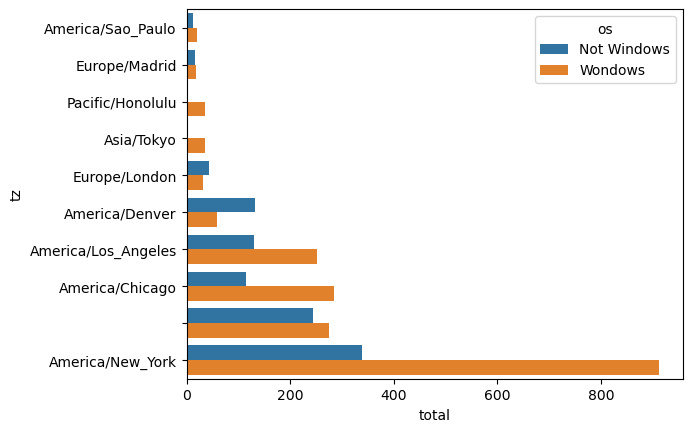

In [47]:
sns.barplot(x="total",   y="tz", hue="os", data=count_subset)

C:\Users\lockd\AppData\Local\Temp\ipykernel_29792\2474611109.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  results = count_subset.groupby("tz").apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

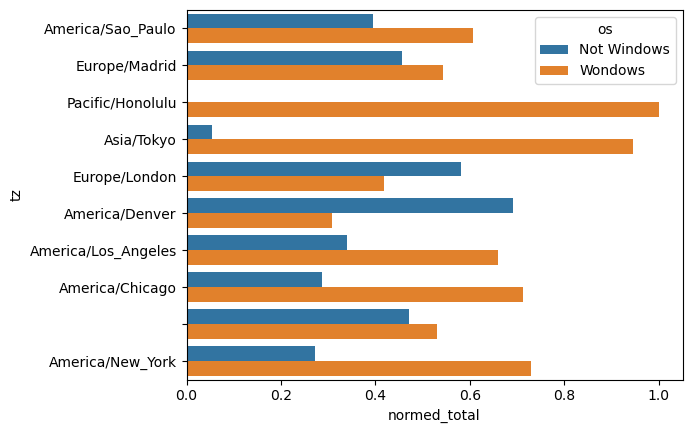

In [48]:
#작은 그룹의 윈도우 사용자 비율을 확인하기 어려움
def norm_total(group):
    group["normed_total"]=group["total"]/group["total"].sum()
    return group
results = count_subset.groupby("tz").apply(norm_total)
sns.barplot(x="normed_total", y="tz", hue="os", data=results)

In [49]:
#정규합을 더 효율적으로 계산할 수도 있다
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

#### 13.2 무비렌즈의 영화 평점 데이터
- 1990년대 말부터 2000년대 초까지 무비렌즈 사용자에게서 수집한 영화 평점 데이터를 제공
- 영화 평점과 영화정보, 사용자 정보까지 포함

In [ ]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]

In [82]:
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [83]:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [84]:
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [85]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [86]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


- 세 테이블에 걸쳐 있는 데이터를 분석해야한다
- 모든 데이터를 하나의 테이블로 병합해 계산하면 매우 쉽게 처리할 수 있다

In [78]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),[Drama]
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),[Drama]
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),[Drama]
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),[Drama]
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),[Drama]
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),[Documentary]
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),[Drama]
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),[Drama]
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),"[Comedy, Drama, Western]"


In [56]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [57]:
#성별에 따른 각 영화의 평균 평점을 구한다
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [58]:
#데이터를 영화 제목으로 그룹화
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [59]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [60]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [62]:
#여성에게 높은 평점을 받은 영화목록
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


#### 13.2.1 평점 차이 구하기

In [63]:
#차이를 담을 수 있는 열을 추가하고 그 열을 기준으로 정렬
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [64]:
#여성이 선호하는 영화
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [65]:
#남성이 선호하는 영화
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [66]:
#성별에 따라 호불호가 크게 나뉘는 영화
#평점의 분산과 표준편차를 이용
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [67]:
#호불호가 갈리는 영화 top 10
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [87]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [90]:
movies["genres"].head().str.split("|")

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [91]:
#문자열을 리스트로 분리
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [92]:
#각 영화 장르별로 하나의 행을 갖는 새로운 DataFrame 생성
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [93]:
#세 테이블을 병합하고 장르별로 그룹화

ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [94]:
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


#### 13.3 신생아 이름

In [1]:
import pandas as pd

C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\lockd\anaconda3\envs\pyTest\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#쉼표로 구분되어 있으니 read_csv 메소드를 사용한다
names = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
names.groupby("sex")["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [4]:
#자료가 연도별 파일로 나뉘어져 있으니 모든 데이터를 DataFrame 하나로 모은 다음 year 항목 추가
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # 연도를 담을 열 추가
    frame["year"] = year
    pieces.append(frame)

# 하나의 데이터 프레임으로 모두 합치기
names = pd.concat(pieces, ignore_index=True)

In [5]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [7]:
#연도나 성별에 따른 데이터 수집
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

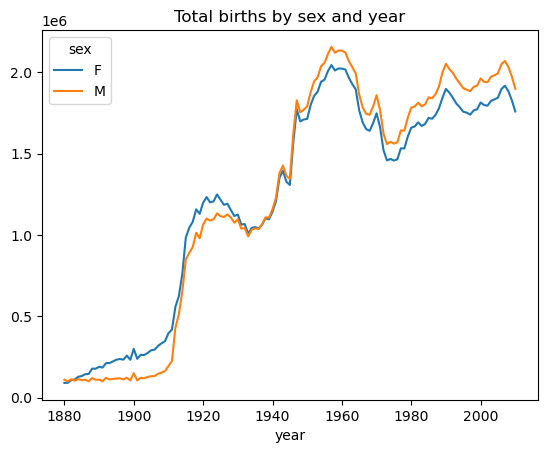

In [8]:
total_births.plot(title="Total births by sex and year")

In [10]:
#전체 출생 수에서 차지하는 각 이름의 비율 계산
#만약 0.02라면 100명중 2명이 이름이 같다는 뜻
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)

In [11]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [12]:
#모든 그룹의 확률 합이 1인지 확인하는 온전성 검사를 하는게 좋음
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [13]:
#연도별/성별에 따른 선호하는 이름 100개
def get_top1000(group): 
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [14]:
#분석에 필요 없는 그룹 색인은 삭제
top1000 = top1000.reset_index(drop=True)

In [15]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


#### 13.3.1 이름 유행 분석

In [16]:
#상위1000개 데이터를 남자와 여자로 구분
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

In [17]:
#연도와 이름에 대한 전체 출생 후를 피벗테이블로 만들기
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

In [18]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

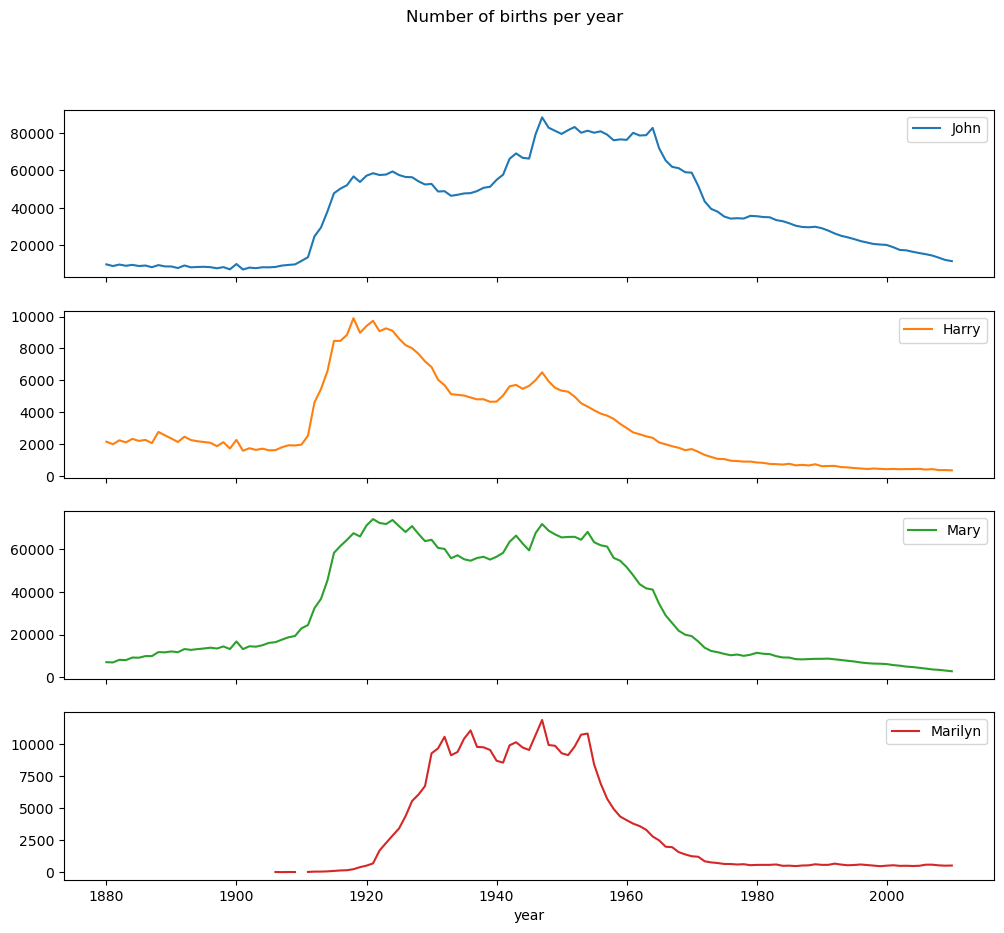

In [19]:
#몇몇 이름의 추이를 그려보자
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year")

In [21]:
import numpy as np

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

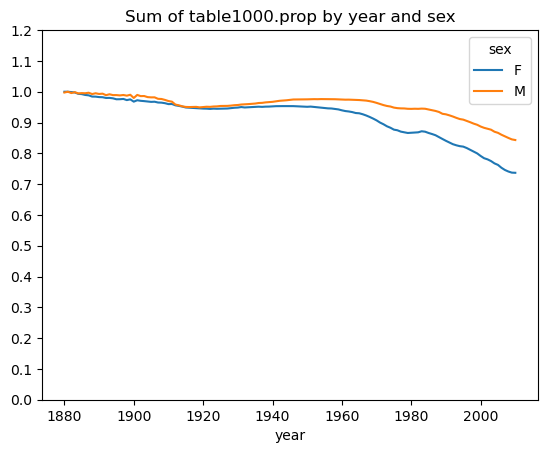

In [22]:
#인기 있는 이름 1000개가 전체 출생 수에서 차지하는 비율을 연도/성별 그래프로 그려보자
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13))

In [23]:
#2010년에 남자아이들의 이름 인기도를 알아보자
df = boys[boys["year"] == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [25]:
#전체의 50%가 되기까지 얼마나 많은 이름들이 등장하는가?
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()

In [27]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [26]:
prop_cumsum.searchsorted(0.5)

116

- 즉 50%가 117개의 이름을 나눠쓰고 있다고한다

In [28]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1 #배열의 색인은 0부터라 그 개수는 +1임

25

- 1900년에는 25개의 인원을 절반이 나눠쓰고있는 셈이다

In [29]:
#연도와 성별을 groupby로 묶고 각 그룹에 apply를 사용해서 연산 적용
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1 #이름 개수

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

In [30]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

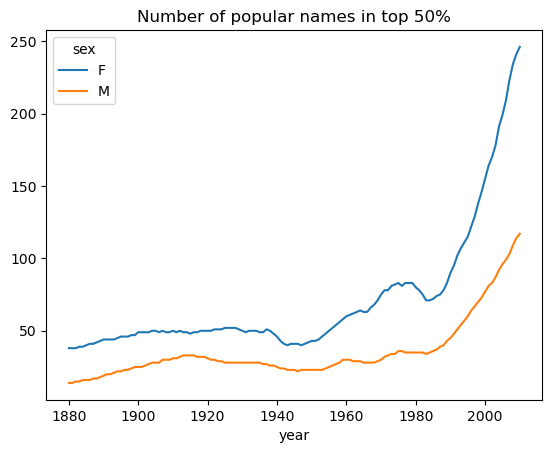

In [31]:
diversity.plot(title="Number of popular names in top 50%")

- 2007년 이름을 연구하는 로라 와튼버그는 100년동안 남자아이의 이름 마지막 글자 분포에 중요한 변화가 있었음을 발견함
- 전체 데이터셋에서 연도와 성별, 이름의 마지막 글자를 수집

In [32]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

In [33]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [34]:
#성별별로 각각의 마지막 글자가 차지하는 비율을 계산하기 위해 전체 출생 수로 정규화
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [35]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

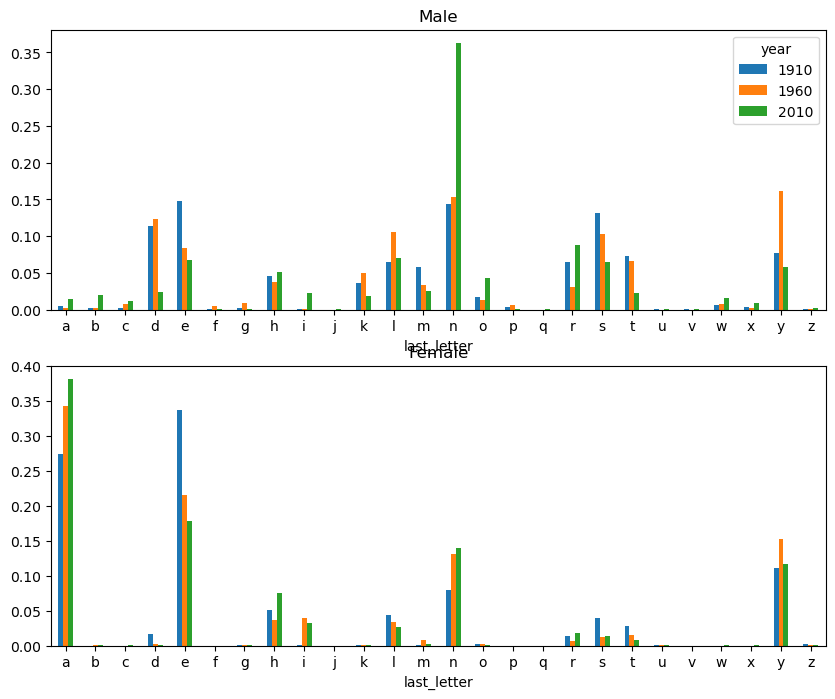

In [36]:
#마지막 글자 비율로 성별과 출생 연도에 대한 막대그래프 그리기
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)

- n으로 끝나는 남자아이 이름의 비율이 갑자기 증가함
- 이름 몇글자를 선택하고 각 열을 시계열로 변환

In [37]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<Axes: xlabel='year'>

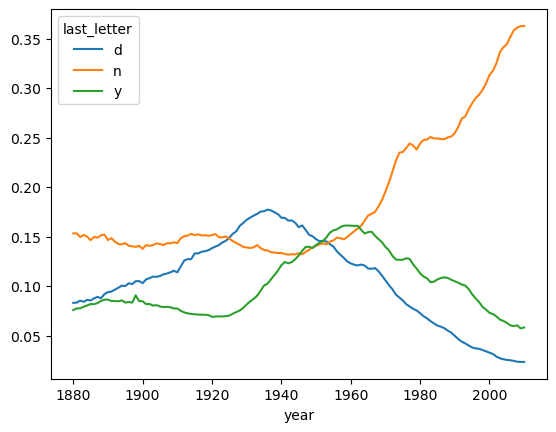

In [38]:
dny_ts.plot()

#### 남자이름과 여자이름이 바뀐 경우

In [39]:
all_names = pd.Series(top1000["name"].unique())
#특정 글자로 시작하는 이름 리스트
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [40]:
#이름별로 출생수를 구하고 상대도수를 확인
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [41]:
#성별과 연도별로 모은 다음 출생 연도로 정규화
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<Axes: xlabel='year'>

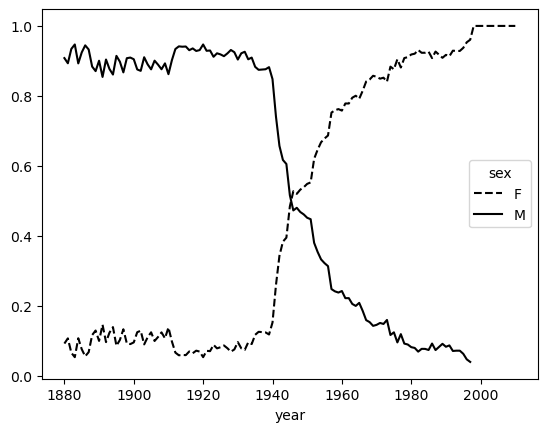

In [42]:
#성별에 따른 비율 그래프
table.plot(style={"M": "k-", "F": "k--"})

#### 13.4 미국 농무부 영양소 정보
- 음식의 영양소 정보 DB

In [43]:
import json
db = json.load(open("datasets/usda_food/database.json"))
len(db)

6636

In [45]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

- nutrients 필드는 딕셔너리의 리스트이며 각 항목은 한가지 영양소에 대한 정보를 담고 있음

In [46]:
db[0]["nutrients"][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [47]:
nutrients = pd.DataFrame(db[0]["nutrients"])

In [44]:
nutrients.head(7)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [48]:
#딕셔너리 리스트를 DataFrame 으로 바꿀 때 추출할 필드 목록을 지정할 수 있음
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [49]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [50]:
pd.value_counts(info["group"])[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [51]:
#모든 영양소 정보 분석을 위해 각 음식의 영양소 정보를 거대한 테이블 하나에 담아보자

nutrients = []

for rec in db:
    #음식 영양소리스트를 하나의 DataFrame으로 변환
    fnuts = pd.DataFrame(rec["nutrients"])
    #음식 id를 위한 열 하나 추가
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [52]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [53]:
#중복데이터처리
nutrients.duplicated().sum() #중복확인

14179

In [54]:
nutrients = nutrients.drop_duplicates()

In [55]:
#객체 이름을 알기쉽게 바꿔준다
col_mapping = {"description" : "food",
               "group"       : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [56]:
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [57]:
#info객체를 nutrients 객체로 병합
ndata = pd.merge(nutrients, info, on="id")
ndata.info()
ndata.iloc[30000]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

<Axes: ylabel='fgroup'>

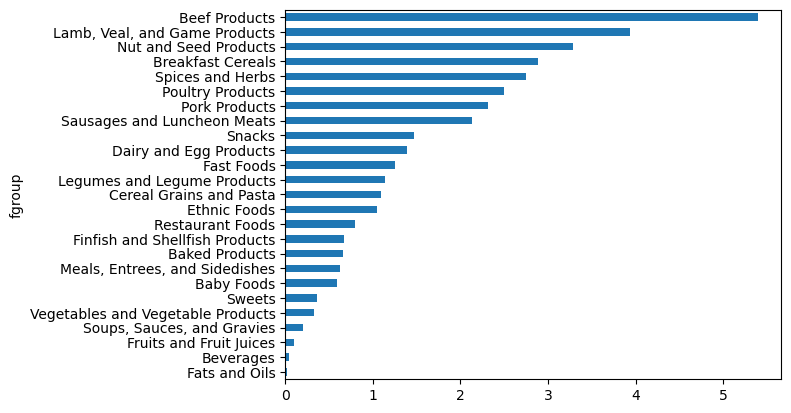

In [58]:
#음식 그룹과 영양소 종류별 중앙값을 그래프로 그릴 수 있음
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")

In [59]:
#idxmax 또는 argmax Series 메서드를 사용하면 각 영양소가 어떤 음식에 가장 많이 들어있는지 찾아볼 수 있음

by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

#음식 종류를 50개로 제한
max_foods["food"] = max_foods["food"].str[:50]

In [60]:
max_foods.loc["Amino Acids"]["food"]

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

#### 13.5 2012년 연방선거관리위원회 데이터베이스
- 정치 활동 후원금과 관련된 데이터를 공개

In [61]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [62]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [63]:
unique_cands = fec["cand_nm"].unique()

In [64]:
unique_cands
unique_cands[2]

'Obama, Barack'

In [66]:
#소속 정당은 딕셔너리를 사용해서 표시
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}